In [6]:
import requests

url = "http://127.0.0.1:8000/"

payload = {}
files=[
    ('data',('testimg.jpg',open('testimg.jpg','rb'),'image/jpeg'))
]
headers = {
    'accept': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload, files=files)

print(response.text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
response.text


In [9]:
#process the result
import cv2
from matplotlib import pyplot as plt
import json



In [ ]:
prediction = json.loads(response.text) #get response in dictionary
y_hat = json.loads(prediction['prediction'])
y_hat

In [17]:
#prediction processing
import numpy as np
y_hat = np.array(y_hat)# wrap as np array
y_hat = np.squeeze(np.where(y_hat > 0.3,1.0,0.0)) # results above 30% return 1 or else 0
y_hat

array([[[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.]],

       [[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        .

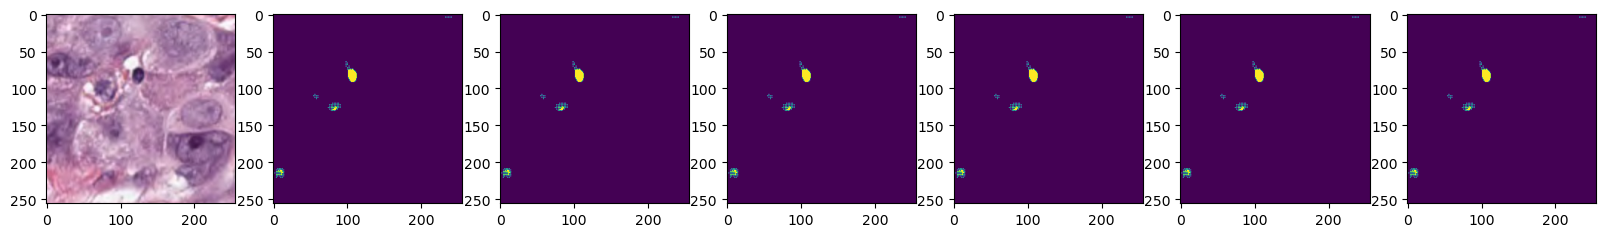

In [18]:
#prediction comparison
x= cv2.imread('testimg.jpg') #load test image

fig,ax = plt.subplots(1,7,figsize = (20,10))
ax[0].imshow(x)
for predictions in range(6):
    ax[predictions+1].imshow(y_hat[:,:,1])